In [1]:
import os

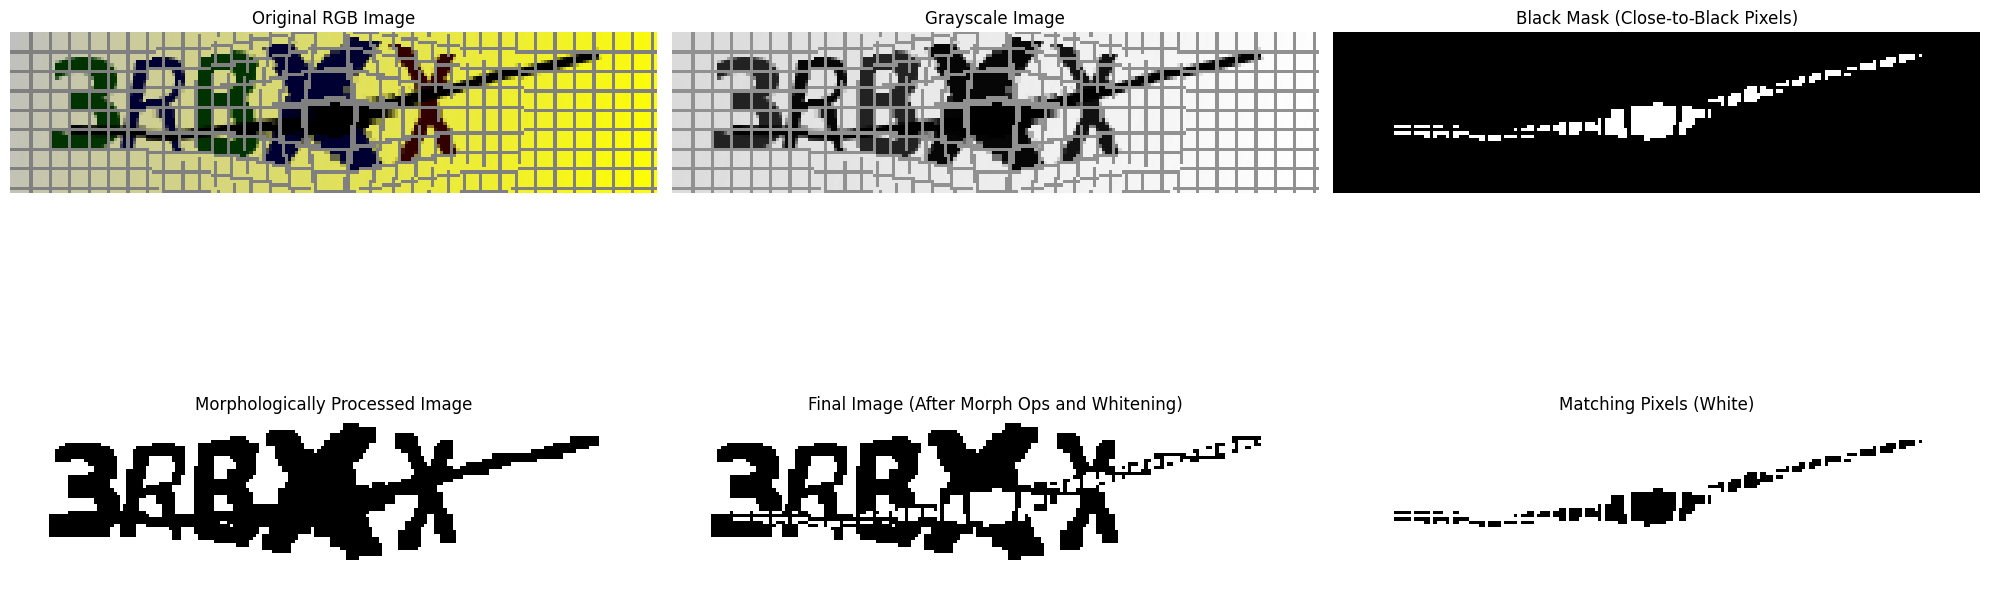

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image_path = r"./captcha.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is None:
    raise Exception("Error: Could not load image at {}".format(image_path))

# Convert BGR (OpenCV default) to RGB (for correct color display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Convert initial image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a threshold for "close to black" in RGB (e.g., pixels where all RGB values are less than 10)
black_threshold = 40  # Adjust this value (0-255) to define what counts as "close to black"

# Create a mask for close-to-black pixels in the original RGB image
black_mask = np.all(image_rgb < black_threshold, axis=2)

# Convert the boolean mask to uint8 for visualization (0 and 255)
black_mask_vis = black_mask.astype(np.uint8) * 255

# Step 2: Morphological Operations on the initial grayscale image
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Step 3: Apply close-to-black pixel whitening to the morphologically processed image
# Convert morphological result back to RGB for consistency (though it's grayscale)
morph_rgb = cv2.cvtColor(morph_image, cv2.COLOR_GRAY2RGB)

# Apply the same black mask to whiten close-to-black areas in the morphological result
cleaned_morph_image = morph_rgb.copy()
cleaned_morph_image[black_mask] = [255, 255, 255]  # Replace close-to-black with white

# Compare pixels and create binary output image
# Convert both images to grayscale for consistent comparison
image1_gray = morph_image.copy()  # Already grayscale
image2_gray = cv2.cvtColor(cleaned_morph_image, cv2.COLOR_RGB2GRAY)

# Check if all pixel values match (no axis=2 needed for 2D arrays)
match_mask = (image1_gray == image2_gray)

# Create output image: white (255) where pixels match, black (0) where they don't
output_image = np.zeros_like(morph_rgb)  # Use morph_rgb shape for RGB output
output_image[match_mask] = [255, 255, 255]  # White for matching pixels
output_image[~match_mask] = [0, 0, 0]      # Black for non-matching pixels

# Plot all results, including the black mask
plt.figure(figsize=(20, 10))

# 1. Original RGB Image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

# 2. Grayscale Image (before morphological operations)
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# 3. Black Mask
plt.subplot(2, 3, 3)
plt.imshow(black_mask_vis, cmap='gray')
plt.title("Black Mask (Close-to-Black Pixels)")
plt.axis('off')

# 4. Morphologically Processed Image (before whitening)
plt.subplot(2, 3, 4)
plt.imshow(morph_image, cmap='gray')
plt.title("Morphologically Processed Image")
plt.axis('off')

# 5. Final Image (After Morphological Operations and Whitening)
plt.subplot(2, 3, 5)
plt.imshow(cleaned_morph_image)
plt.title("Final Image (After Morph Ops and Whitening)")
plt.axis('off')

# 6. Output Image (White for Matches, Black for Differences)
plt.subplot(2, 3, 6)
plt.imshow(output_image)
plt.title("Matching Pixels (White)")
plt.axis('off')

plt.tight_layout()
plt.show()

contours, _ = cv2.findContours(cleaned_morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Draw the Contours on the Original Image
img_with_contours = cleaned_morph_image.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)  # Green contours

# Display the result
img_rgb = cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.title("Contours on Letters")
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### Contours on Letters

In [5]:
contours, _ = cv2.findContours(cleaned_morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Draw the Contours on the Original Image
img_with_contours = cleaned_morph_image.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)  # Green contours

# Display the result
img_rgb = cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.title("Contours on Letters")
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours_new.cpp:330: error: (-2:Unspecified error) in function 'class std::shared_ptr<struct ContourScanner_> __cdecl ContourScanner_::create(class cv::Mat,int,int,class cv::Point_<int>)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 16 (CV_8UC3)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)


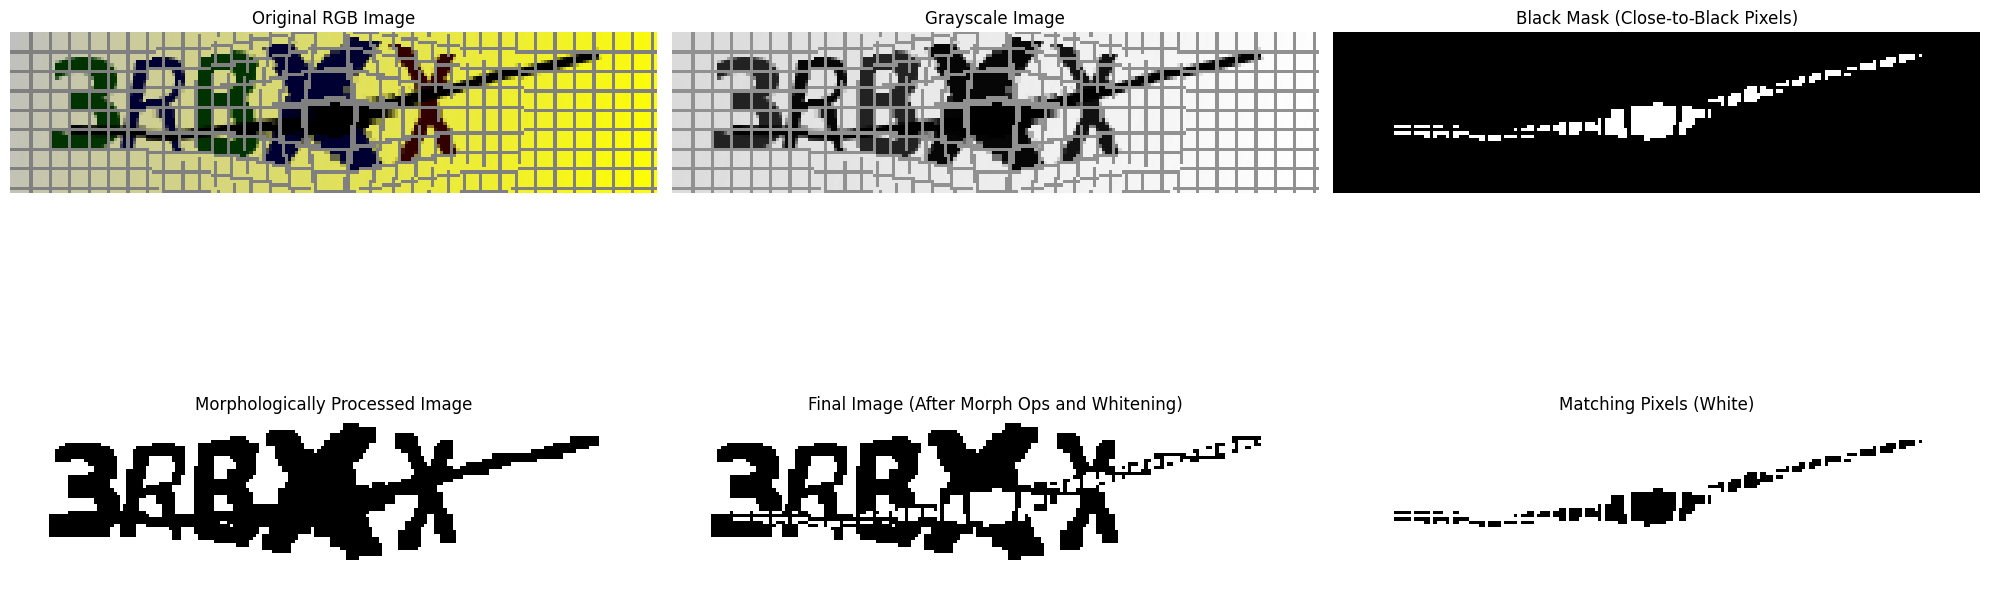

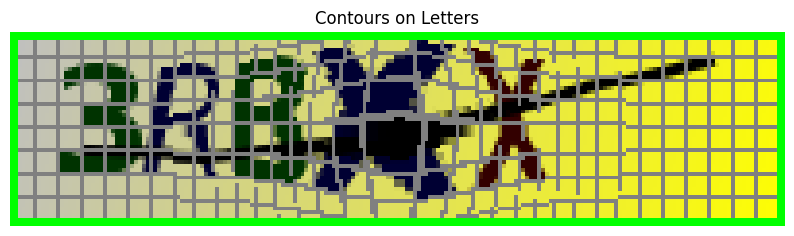

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image_path = r"./captcha.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is None:
    raise Exception("Error: Could not load image at {}".format(image_path))

# Convert BGR (OpenCV default) to RGB (for correct color display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Convert initial image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a threshold for "close to black" in RGB (e.g., pixels where all RGB values are less than 10)
black_threshold = 40  # Adjust this value (0-255) to define what counts as "close to black"

# Create a mask for close-to-black pixels in the original RGB image
black_mask = np.all(image_rgb < black_threshold, axis=2)

# Convert the boolean mask to uint8 for visualization (0 and 255)
black_mask_vis = black_mask.astype(np.uint8) * 255

# Step 2: Morphological Operations on the initial grayscale image
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Step 3: Apply close-to-black pixel whitening to the morphologically processed image
# Convert morphological result back to RGB for consistency (though it's grayscale)
morph_rgb = cv2.cvtColor(morph_image, cv2.COLOR_GRAY2RGB)

# Apply the same black mask to whiten close-to-black areas in the morphological result
cleaned_morph_image = morph_rgb.copy()
cleaned_morph_image[black_mask] = [255, 255, 255]  # Replace close-to-black with white

# Compare pixels and create binary output image
# Convert both images to grayscale for consistent comparison
image1_gray = morph_image.copy()  # Already grayscale
image2_gray = cv2.cvtColor(cleaned_morph_image, cv2.COLOR_RGB2GRAY)

# Check if all pixel values match (no axis=2 needed for 2D arrays)
match_mask = (image1_gray == image2_gray)

# Create output image: white (255) where pixels match, black (0) where they don't
output_image = np.zeros_like(morph_rgb)  # Use morph_rgb shape for RGB output
output_image[match_mask] = [255, 255, 255]  # White for matching pixels
output_image[~match_mask] = [0, 0, 0]      # Black for non-matching pixels

# Plot all results, including the black mask
plt.figure(figsize=(20, 10))

# 1. Original RGB Image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

# 2. Grayscale Image (before morphological operations)
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# 3. Black Mask
plt.subplot(2, 3, 3)
plt.imshow(black_mask_vis, cmap='gray')
plt.title("Black Mask (Close-to-Black Pixels)")
plt.axis('off')

# 4. Morphologically Processed Image (before whitening)
plt.subplot(2, 3, 4)
plt.imshow(morph_image, cmap='gray')
plt.title("Morphologically Processed Image")
plt.axis('off')

# 5. Final Image (After Morphological Operations and Whitening)
plt.subplot(2, 3, 5)
plt.imshow(cleaned_morph_image)
plt.title("Final Image (After Morph Ops and Whitening)")
plt.axis('off')

# 6. Output Image (White for Matches, Black for Differences)
plt.subplot(2, 3, 6)
plt.imshow(output_image)
plt.title("Matching Pixels (White)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 4: Find and draw contours
# Convert cleaned image back to BGR for OpenCV processing
cleaned_bgr = cv2.cvtColor(cleaned_morph_image, cv2.COLOR_RGB2BGR)
# Convert to binary image for contour detection
_, binary = cv2.threshold(cv2.cvtColor(cleaned_bgr, cv2.COLOR_BGR2GRAY), 128, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original RGB image
contoured_image = image_rgb.copy()
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)  # Green contours in RGB

# Display the result
plt.figure(figsize=(10, 6))
plt.title("Contours on Letters")
plt.imshow(contoured_image)
plt.axis('off')
plt.show()

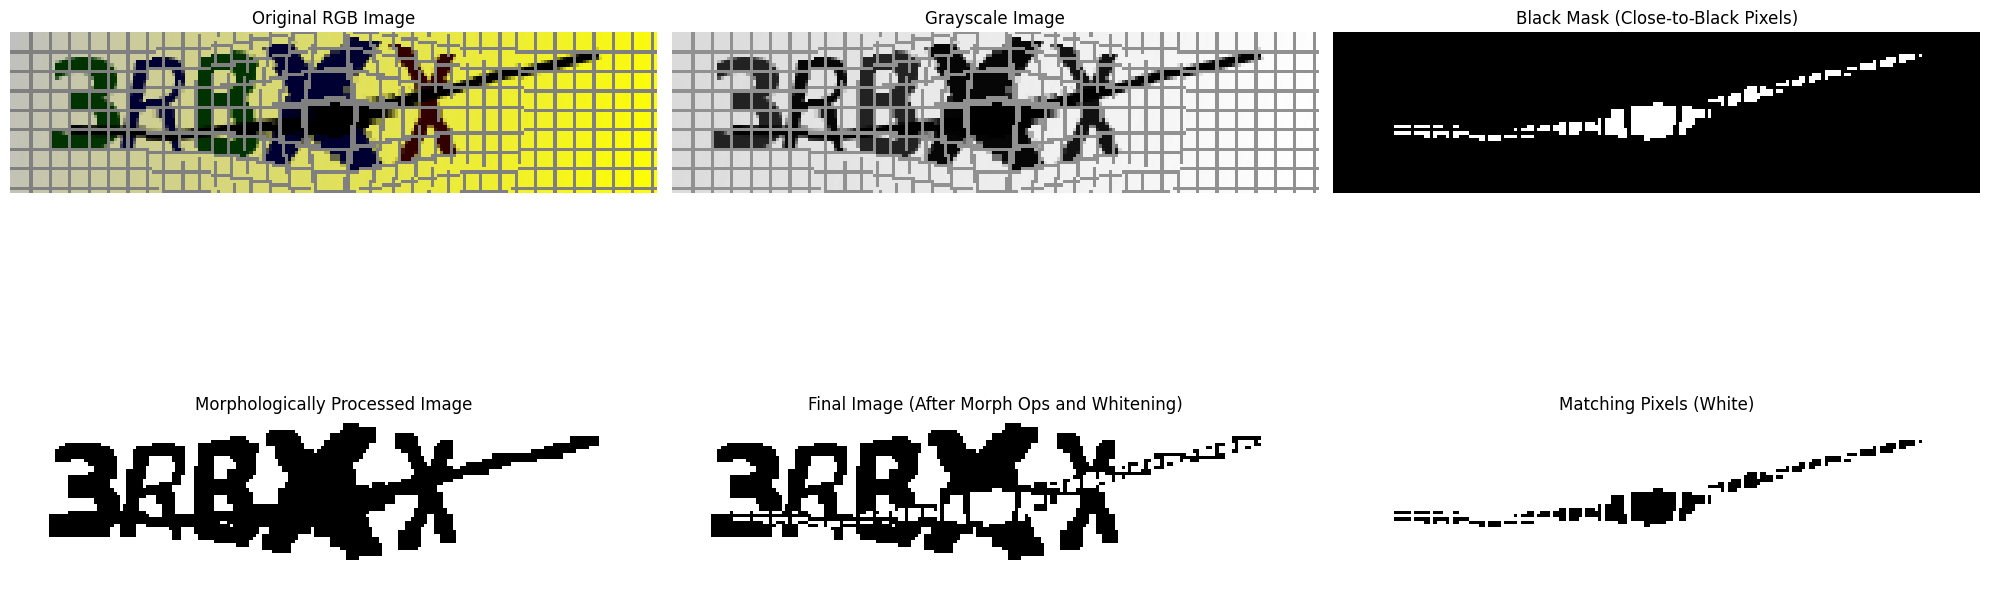

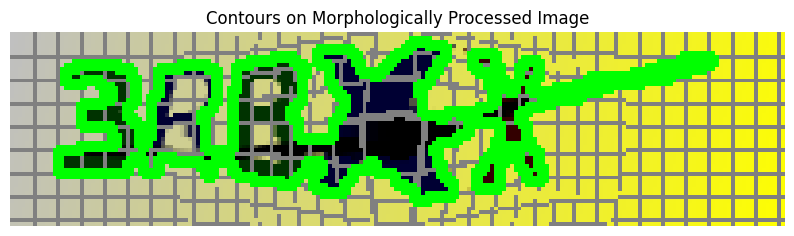

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image_path = r"./captcha.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is None:
    raise Exception("Error: Could not load image at {}".format(image_path))

# Convert BGR (OpenCV default) to RGB (for correct color display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Convert initial image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a threshold for "close to black" in RGB (e.g., pixels where all RGB values are less than 10)
black_threshold = 40  # Adjust this value (0-255) to define what counts as "close to black"

# Create a mask for close-to-black pixels in the original RGB image
black_mask = np.all(image_rgb < black_threshold, axis=2)

# Convert the boolean mask to uint8 for visualization (0 and 255)
black_mask_vis = black_mask.astype(np.uint8) * 255

# Step 2: Morphological Operations on the initial grayscale image
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Step 3: Apply close-to-black pixel whitening to the morphologically processed image
# Convert morphological result back to RGB for consistency (though it's grayscale)
morph_rgb = cv2.cvtColor(morph_image, cv2.COLOR_GRAY2RGB)

# Apply the same black mask to whiten close-to-black areas in the morphological result
cleaned_morph_image = morph_rgb.copy()
cleaned_morph_image[black_mask] = [255, 255, 255]  # Replace close-to-black with white

# Compare pixels and create binary output image
# Convert both images to grayscale for consistent comparison
image1_gray = morph_image.copy()  # Already grayscale
image2_gray = cv2.cvtColor(cleaned_morph_image, cv2.COLOR_RGB2GRAY)

# Check if all pixel values match (no axis=2 needed for 2D arrays)
match_mask = (image1_gray == image2_gray)

# Create output image: white (255) where pixels match, black (0) where they don't
output_image = np.zeros_like(morph_rgb)  # Use morph_rgb shape for RGB output
output_image[match_mask] = [255, 255, 255]  # White for matching pixels
output_image[~match_mask] = [0, 0, 0]      # Black for non-matching pixels

# Plot all results, including the black mask
plt.figure(figsize=(20, 10))

# 1. Original RGB Image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

# 2. Grayscale Image (before morphological operations)
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# 3. Black Mask
plt.subplot(2, 3, 3)
plt.imshow(black_mask_vis, cmap='gray')
plt.title("Black Mask (Close-to-Black Pixels)")
plt.axis('off')

# 4. Morphologically Processed Image (before whitening)
plt.subplot(2, 3, 4)
plt.imshow(morph_image, cmap='gray')
plt.title("Morphologically Processed Image")
plt.axis('off')

# 5. Final Image (After Morphological Operations and Whitening)
plt.subplot(2, 3, 5)
plt.imshow(cleaned_morph_image)
plt.title("Final Image (After Morph Ops and Whitening)")
plt.axis('off')

# 6. Output Image (White for Matches, Black for Differences)
plt.subplot(2, 3, 6)
plt.imshow(output_image)
plt.title("Matching Pixels (White)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 4: Find and draw contours on Morphologically Processed Image
# Convert morph_image (which is grayscale) to binary for contour detection
_, binary_morph = cv2.threshold(morph_image, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original RGB image
contoured_image = image_rgb.copy()
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)  # Green contours in RGB

# Display the result
plt.figure(figsize=(10, 6))
plt.title("Contours on Morphologically Processed Image")
plt.imshow(contoured_image)
plt.axis('off')
plt.show()